In [47]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time

In [48]:
# portfolio of stocks
# S&P 500 (^GSPC)
# NASDAQ Composite (^IXIC)
# Dow Jones Industrial Average (^DJI)

stocks = ['^GSPC', '^IXIC', '^DJI', '^GDAXI', '^N225', 'RTY=F']

#### Download historical data from yf API

In [49]:
# import yfinance as yf

# start_date = "2020-01-01"
# end_date = datetime.now().strftime("%Y-%m-%d")

# # Download historical data from yf API
# data = yf.download(stocks, start=start_date, end=end_date, group_by='ticker')

# # download data to csv
# data.to_csv("INDEXES.csv")

#### Download analysis from csv downloaded data

In [50]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("INDEXES.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Forward fill missing values for each column
df = df.fillna(method='ffill')

# Convert all values to float
df = df.astype(float)

# rename tickers to more readable names, ^DJI -> DJ, ^GSPC -> SP, ^IXIC -> NQ
df.columns = pd.MultiIndex.from_tuples([
    (
        col[0].replace('^DJI', 'DJ').replace('^GSPC', 'SP').replace('^IXIC', 'NQ').replace('^GDAXI', 'DAX').replace('^N225', 'NKY').replace('RTY=F', 'RUT'),
        col[1]
    ) for col in df.columns
])


# Show the result
df.head()

DAX                                            \
                    Open          High           Low         Close   
Date                                                                 
2020-01-02  13233.709961  13425.030273  13225.160156  13385.929688   
2020-01-03  13266.389648  13282.740234  13120.719727  13219.139648   
2020-01-06  13085.490234  13143.110352  12948.169922  13126.990234   
2020-01-07  13199.589844  13283.879883  13166.400391  13226.830078   
2020-01-08  13140.490234  13334.040039  13106.269531  13320.179688   

                                 NKY                              \
                Volume          Open          High           Low   
Date                                                               
2020-01-02  75341400.0           NaN           NaN           NaN   
2020-01-03  80793400.0           NaN           NaN           NaN   
2020-01-06  71778600.0  23319.759766  23365.359375  23148.529297   
2020-01-07  78282300.0  23320.119141  23577.439453  23299.919922   
2020-01-08  88178800.0  23217.490234  23303.210938  22951.179688   

                                      ...           NQ               \
                   Close      Volume  ...         Open         High   
Date                                  ...                             
2020-01-02           NaN         NaN  ...  9039.459961  9093.429688   
2020-01-03           NaN         NaN  ...  8976.429688  9065.759766   
2020-01-06  23204.859375  72800000.0  ...  8943.500000  9072.410156   
2020-01-07  23575.720703  64300000.0  ...  9076.639648  9091.929688   
2020-01-08  23204.759766  79400000.0  ...  9068.030273  9168.889648   

                                                              DJ  \
                    Low        Close        Volume          Open   
Date                                                               
2020-01-02  9010.889648  9092.190430  2.862700e+09  28638.970703   
2020-01-03  8976.429688  9020.769531  2.586520e+09  28553.330078   
2020-01-06  8943.500000  9071.469727  2.810450e+09  28465.500000   
2020-01-07  9042.549805  9068.580078  2.381740e+09  28639.179688   
2020-01-08  9059.379883  9129.240234  2.472620e+09  28556.140625   

                                                                   
                    High           Low         Close       Volume  
Date                                                               
2020-01-02  28872.800781  28627.769531  28868.800781  251820000.0  
2020-01-03  28716.310547  28500.359375  28634.880859  239590000.0  
2020-01-06  28708.019531  28418.630859  28703.380859  252760000.0  
2020-01-07  28685.500000  28565.279297  28583.679688  258900000.0  
2020-01-08  28866.179688  28522.509766  28745.089844  291750000.0  

[5 rows x 30 columns]

In [51]:
# # Here you can plot the charts for every ticker

# # For every ticker, plot Close
# import matplotlib.pyplot as plt

# for ticker in df.columns.levels[0]:
#     plt.figure(figsize=(12, 6))
#     plt.plot(df[ticker]['Close'], label=ticker)
#     plt.title(f"{ticker} Close Price")
#     plt.xlabel("Date")
#     plt.ylabel("Close Price")
#     plt.legend()
#     plt.show()

In [52]:
# df SP500, df level 0 = 'SP'
sp = df['SP']

# drop Open, High, Low
sp = sp.drop(['Open', 'High', 'Low'], axis=1)

sp.head()

,Close,Volume
Date,,
2020-01-02,3257.850098,3.459930e+09
2020-01-03,3234.850098,3.484700e+09
2020-01-06,3246.280029,3.702460e+09
2020-01-07,3237.179932,3.435910e+09
2020-01-08,3253.050049,3.726840e+09


In [53]:
nq = df['NQ']

# drop Open, High, Low
nq = nq.drop(['Open', 'High', 'Low'], axis=1)

nq.head()

,Close,Volume
Date,,
2020-01-02,9092.190430,2.862700e+09
2020-01-03,9020.769531,2.586520e+09
2020-01-06,9071.469727,2.810450e+09
2020-01-07,9068.580078,2.381740e+09
2020-01-08,9129.240234,2.472620e+09


In [54]:
dj = df['DJ']

# drop Open, High, Low
dj = dj.drop(['Open', 'High', 'Low'], axis=1)

dj.head()

,Close,Volume
Date,,
2020-01-02,28868.800781,251820000.0
2020-01-03,28634.880859,239590000.0
2020-01-06,28703.380859,252760000.0
2020-01-07,28583.679688,258900000.0
2020-01-08,28745.089844,291750000.0


In [55]:
# Check the index type
print("Index type:", type(sp.index))
print("Index dtype:", sp.index.dtype)
print("First few index values:", sp.index[:5])

# Convert index to datetime if it's not already
if not isinstance(sp.index, pd.DatetimeIndex):
    sp.index = pd.to_datetime(sp.index)
    print("Index converted to DatetimeIndex")

print("New index type:", type(sp.index))

Index type: <class 'pandas.core.indexes.base.Index'>
Index dtype: object
First few index values: Index(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07', '2020-01-08'], dtype='object', name='Date')
Index converted to DatetimeIndex
New index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


In [56]:
# Fix the datetime index for NQ and DJ as well
if not isinstance(nq.index, pd.DatetimeIndex):
    nq.index = pd.to_datetime(nq.index)
    print("NQ index converted to DatetimeIndex")

if not isinstance(dj.index, pd.DatetimeIndex):
    dj.index = pd.to_datetime(dj.index)
    print("DJ index converted to DatetimeIndex")

print("All indices are now DatetimeIndex")

NQ index converted to DatetimeIndex
DJ index converted to DatetimeIndex
All indices are now DatetimeIndex


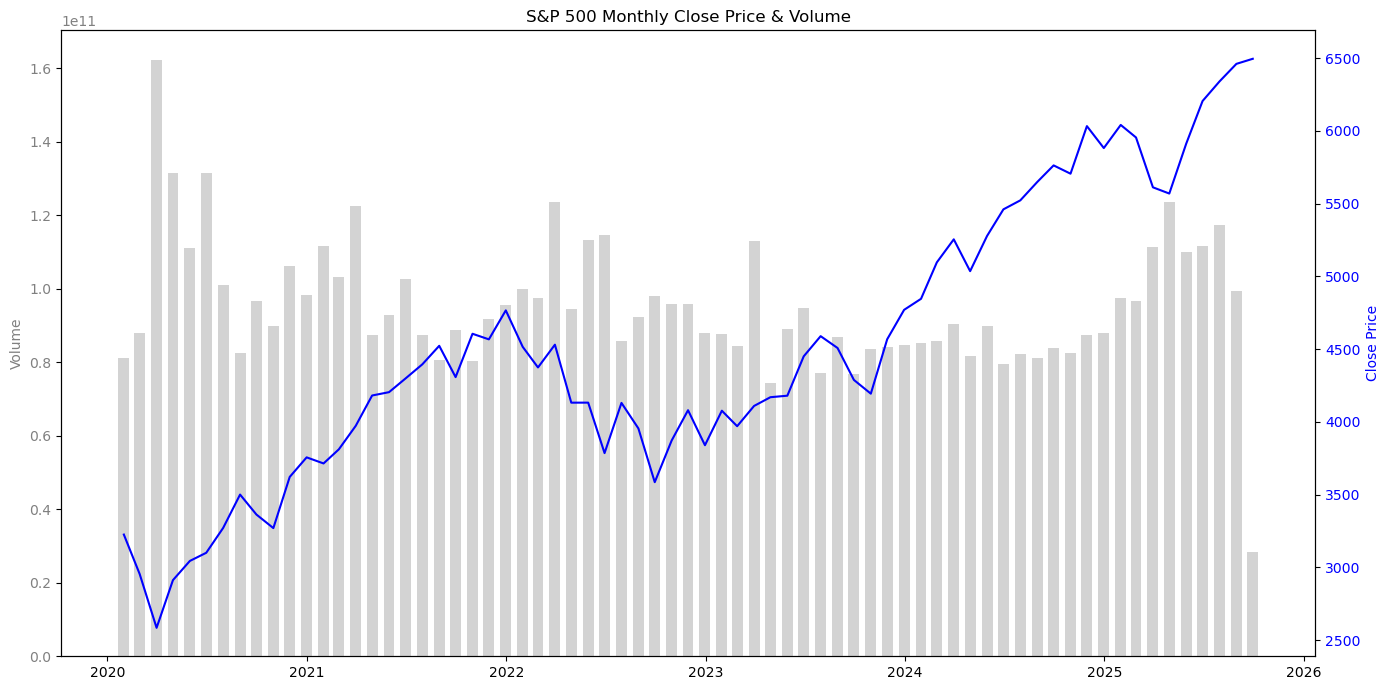

In [57]:
# sp['Volume'].plot(kind='bar', figsize=(12, 6), title='SP Volume');
# Resample to monthly frequency
sp_monthly = sp.resample('M').agg({'Close': 'last', 'Volume': 'sum'})

fig, ax1 = plt.subplots(figsize=(14, 7))

# Bar chart for Volume
ax1.bar(sp_monthly.index, sp_monthly['Volume'], width=20, color='lightgray', label='Monthly Volume')
ax1.set_ylabel('Volume', color='gray')
ax1.tick_params(axis='y', labelcolor='gray')

# Line chart for Close price
ax2 = ax1.twinx()
ax2.plot(sp_monthly.index, sp_monthly['Close'], color='blue', label='Monthly Close')
ax2.set_ylabel('Close Price', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('S&P 500 Monthly Close Price & Volume')
fig.tight_layout()
plt.show()

In [58]:
import plotly.io as pio
pio.renderers.default = 'vscode'

In [59]:
import plotly.express as px
import plotly.graph_objects as go

px.histogram(sp, x='Volume', y='Close', nbins=150, orientation='h').show()

In [60]:
# Histogram: sum of volume for price bin 
hist = go.Histogram(
    y=sp['Close'],
    x=sp['Volume'],
    nbinsy=150,
    orientation='h',
    name='Volume Profile',
    marker_color='#B0C4DE',
    opacity=0.5,         # Bins opacity
    xaxis='x2',
)

# Line plot: Close prices over time
line = go.Scatter(
    x=sp.index,
    y=sp['Close'],
    mode='lines',
    name='SP Close',
    marker_color='blue',
    xaxis='x',
    yaxis='y',
)

# First we plot the histogram, then the line chart
fig = go.Figure([hist, line])

fig.update_layout(
    xaxis=dict(
        title='Date',
        anchor='y',
        domain=[0, 1],
        showgrid=False,
        side='bottom'
    ),
    xaxis2=dict(
        title='Sum of Volume',
        overlaying='x',
        side='top',
        showgrid=False
    ),
    yaxis=dict(
        title='Close Price',
        showgrid=True
    ),
    legend=dict(
        orientation='h',
        yanchor='bottom',
        y=1.02,
        xanchor='right',
        x=1
    ),
    height=600,
    title='Volume Profile & SP Close Prices'
)

fig.show()

In [61]:
# Kernel Density Estimator (KDE) plot
from scipy import stats, signal

"""
stats provides statistical functions and probability distributions for data analysis.

signal offers tools for signal processing, such as filtering, peak detection, 
and Fourier transforms.

These modules are commonly used for advanced data analysis and scientific computing in Python.
"""

kde_factor = 0.05
num_samples = 500
kde = stats.gaussian_kde(sp.Close, weights=sp.Volume, bw_method=kde_factor)
xr = np.linspace(sp.Close.min(), sp.Close.max(), num_samples)
kdy = kde(xr)
ticks_per_sample = (xr.max() - xr.min()) / num_samples

def get_dist_plot(c, v, kx, ky):
    fig = go.Figure()
    fig.add_trace(go.Histogram(name='Vol Profile', x=c, y=v, nbinsx=150, 
                               histfunc='sum', histnorm='probability density',
                               marker_color='#B0C4DE'))
    fig.add_trace(go.Scatter(name='KDE', x=kx, y=ky, mode='lines', marker_color='#D2691E'))
    return fig

get_dist_plot(sp.Close, sp.Volume, xr, kdy).show()

The Kernel Density Estimator (KDE) is a non-parametric method to estimate the probability density function of a continuous variable. It smooths the observed data using a kernel function, providing a continuous curve that represents the distribution of the data. KDE is useful for visualizing the underlying structure of the data, identifying modes, and comparing distributions.

In [62]:
# Volume Peaks
peaks,_ = signal.find_peaks(kdy)
pkx = xr[peaks]
pky = kdy[peaks]

pk_marker_args=dict(size=10)
fig = get_dist_plot(sp.Close, sp.Volume, xr, kdy)
fig.add_trace(go.Scatter(name="Peaks", x=pkx, y=pky, mode='markers', marker=pk_marker_args))

In [63]:
# Find peaks, peak_props
peaks, peak_props = signal.find_peaks(kdy, prominence=0.00001)

pkx = xr[peaks]
pky = kdy[peaks]

# Fig 
fig = get_dist_plot(sp.Close, sp.Volume, xr, kdy)

# Add peaks markers
fig.add_trace(go.Scatter(
    x=pkx, y=pky,
    mode="markers",
    name="Peaks",
    marker=dict(color="blue", size=8, symbol="circle")
))

# Draw vertical lines from the peaks downwards (prominence)
for x, y0, prom in zip(pkx, pky, peak_props["prominences"]):
    fig.add_shape(
        type="line",
        xref="x", yref="y",
        x0=x, x1=x,
        y0=y0, y1=y0 - prom,
        line=dict(color="red", width=2)
    )

fig.show()

In [64]:
# Peak Width
width_range=1
peaks, peak_props = signal.find_peaks(kdy, prominence=0.00001, width=width_range)

left_ips = peak_props['left_ips']
right_ips = peak_props['right_ips']
width_x0 = xr.min() + (left_ips * ticks_per_sample)
width_x1 = xr.min() + (right_ips * ticks_per_sample)
width_y = peak_props['width_heights']

fig = get_dist_plot(sp.Close, sp.Volume, xr, kdy)
fig.add_trace(go.Scatter(name='Peaks', x=pkx, y=pky, mode='markers', marker=pk_marker_args))

for x0, x1, y in zip(width_x0, width_x1, width_y):
    fig.add_shape(type='line',
        xref='x', yref='y',
        x0=x0, y0=y, x1=x1, y1=y,
        line=dict(
            color='red',
            width=2,
        )
    )
fig.show()

In [65]:
# Working solution for MarketProfile with large dataset
from market_profile import MarketProfile

# Clean the data
sp_clean = sp.dropna(subset=['Close', 'Volume']).sort_index()

print(f"Data shape after cleaning: {sp_clean.shape}")
print(f"Date range: {sp_clean.index.min()} to {sp_clean.index.max()}")

# Use recent data (last 2 years) to avoid library limitations with very large datasets
recent_data = sp_clean.tail(500)  # Last ~2 years of trading days

# Create MarketProfile with recent data
mp = MarketProfile(recent_data)
mp_slice = mp[recent_data.index[0]:recent_data.index[-1]]

print(f"✅ MarketProfile created successfully with {len(recent_data)} days of data")
print(f"Analysis period: {recent_data.index[0].date()} to {recent_data.index[-1].date()}")

Data shape after cleaning: (1480, 2)
Date range: 2020-01-02 00:00:00 to 2025-09-08 00:00:00
✅ MarketProfile created successfully with 500 days of data
Analysis period: 2023-10-06 to 2025-09-08


In [66]:
mp_slice.profile

Close
4117.40    4.019500e+09
4137.25    4.277640e+09
4166.85    3.911140e+09
4186.80    3.869370e+09
4193.80    4.249470e+09
               ...     
6481.40    4.143680e+09
6481.50    5.066120e+09
6495.15    5.211500e+09
6501.90    4.283760e+09
6502.10    4.670770e+09
Name: Volume, Length: 477, dtype: float64

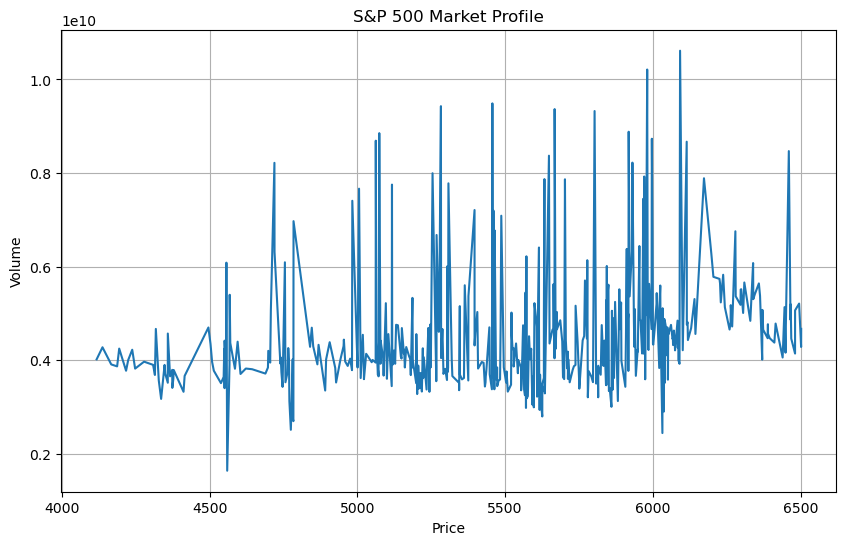

In [67]:
# plot mp_slice.profile
plt.figure(figsize=(10,6))
plt.plot(mp_slice.profile.index, mp_slice.profile.values)
plt.title('S&P 500 Market Profile')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.grid()
plt.show()

In [68]:
# mp_slice.initial_balance()
# mp_slice.open_range()

In [69]:
mp_slice.poc_price

np.float64(6092.2)

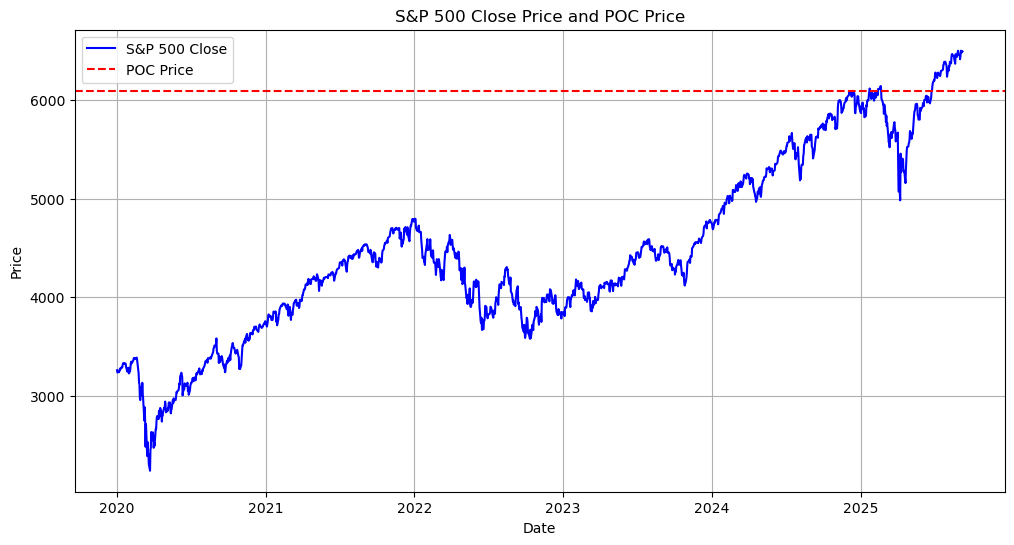

In [70]:
# plot sp.Close and mp_slice.poc_price as horizontal line 
plt.figure(figsize=(12,6))
plt.plot(sp.index, sp['Close'], label='S&P 500 Close', color='blue')
plt.axhline(mp_slice.poc_price, label='POC Price', color='red', linestyle='--')
plt.title('S&P 500 Close Price and POC Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [71]:
mp_slice.profile_range

(np.float64(4117.4), np.float64(6502.1))

In [72]:
mp_slice.value_area

(np.float64(5241.55), np.float64(6502.1))

In [73]:
mp_slice.balanced_target

np.float64(8067.0)

In [74]:
mp_slice.low_value_nodes

Close
4186.80    3.869370e+09
4217.05    3.776100e+09
4247.70    3.821820e+09
4314.65    3.686030e+09
4335.70    3.174630e+09
               ...     
6439.35    4.059070e+09
6449.15    4.162290e+09
6465.95    4.867680e+09
6481.40    4.143680e+09
6501.90    4.283760e+09
Name: Volume, Length: 161, dtype: float64

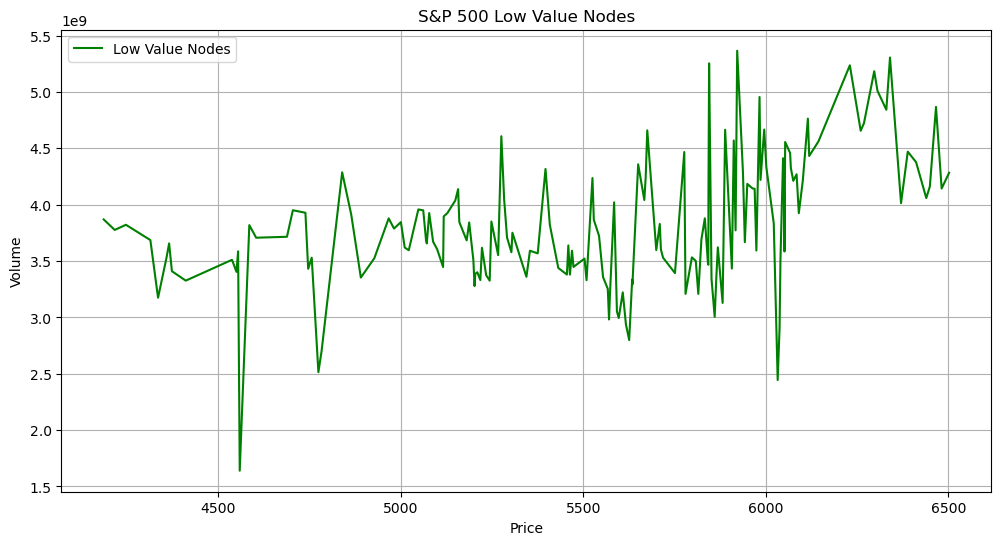

In [75]:
# plot mp_slice.low_value_nodes
plt.figure(figsize=(12,6))
plt.plot(mp_slice.low_value_nodes.index, mp_slice.low_value_nodes.values, label='Low Value Nodes', color='green')
plt.title('S&P 500 Low Value Nodes')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

In [76]:
mp_slice.high_value_nodes

Close
4137.25    4.277640e+09
4193.80    4.249470e+09
4237.90    4.224900e+09
4278.00    3.969730e+09
4317.80    4.669780e+09
               ...     
6415.55    4.784000e+09
6445.80    5.135300e+09
6460.30    8.469680e+09
6466.60    5.195950e+09
6495.15    5.211500e+09
Name: Volume, Length: 161, dtype: float64

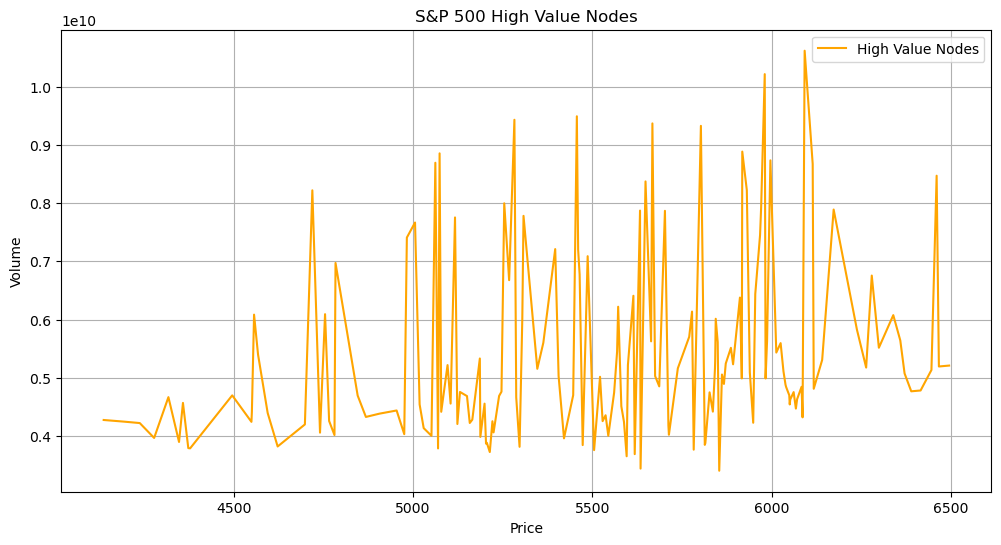

In [77]:
# plot mp_slice.high_value_nodes
plt.figure(figsize=(12,6))
plt.plot(mp_slice.high_value_nodes.index, mp_slice.high_value_nodes.values, label='High Value Nodes', color='orange')
plt.title('S&P 500 High Value Nodes')
plt.xlabel('Price')
plt.ylabel('Volume')
plt.legend()
plt.grid()
plt.show()

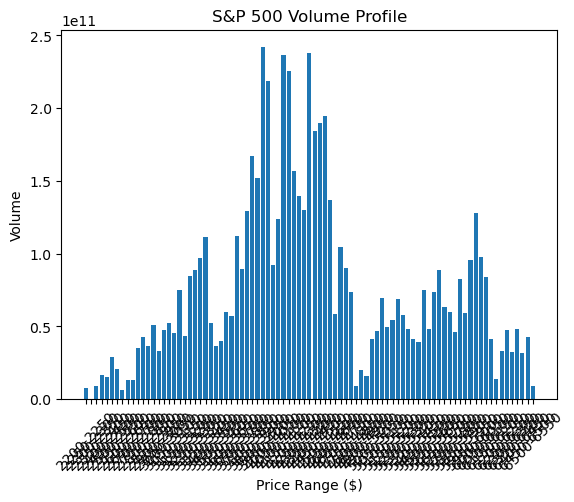

In [78]:
# Calculate the price range and bin edges every $50
bin_size = 50
min_price = np.floor(sp.Close.min() / bin_size) * bin_size
max_price = np.ceil(sp.Close.max() / bin_size) * bin_size
bin_edges = np.arange(min_price, max_price + bin_size, bin_size)
num_bins = len(bin_edges) - 1

# Use np.histogram to sum volumes in each price bin
volume_profile, _ = np.histogram(sp.Close, bins=bin_edges, weights=sp.Volume)

# Plot the Volume Profile
plt.bar(range(num_bins), volume_profile, width=0.8, align='center')
plt.xticks(
    range(num_bins),
    [f'{bin_edges[i]:.0f}-{bin_edges[i+1]:.0f}' for i in range(num_bins)],
    rotation=45
)
plt.xlabel('Price Range ($)')
plt.ylabel('Volume')
plt.title('S&P 500 Volume Profile')
plt.show()

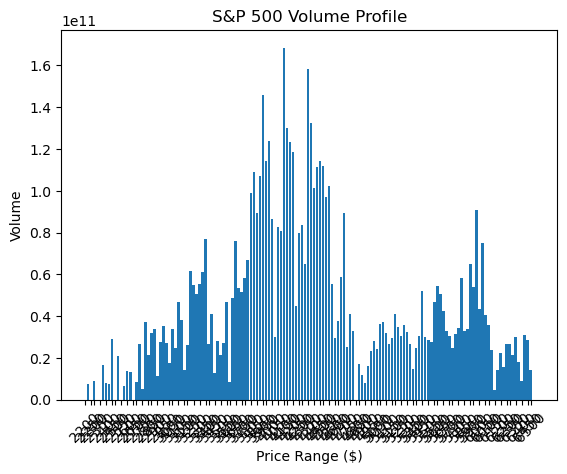

In [79]:
# Volume profile with 150 bins, labels every 50$
num_bins = 150
min_price = np.floor(sp.Close.min() / 50) * 50
max_price = np.ceil(sp.Close.max() / 50) * 50
bin_edges = np.linspace(min_price, max_price, num_bins + 1)

# Calculate the aggregated volume for each bin
volume_profile, _ = np.histogram(sp.Close, bins=bin_edges, weights=sp.Volume)

# Find the positions of the ticks closest to the multiples of 50
xtick_labels = []
xtick_positions = []
for price in np.arange(min_price, max_price + 1, 50):
    # Find the bin closest to the desired tick
    idx = np.argmin(np.abs(bin_edges - price))
    if idx < num_bins:  # only if the bin is valid
        xtick_positions.append(idx)
        xtick_labels.append(f'{int(price)}')

# Plot
plt.bar(range(num_bins), volume_profile, width=0.8, align='center')
plt.xticks(xtick_positions, xtick_labels, rotation=45)
plt.xlabel('Price Range ($)')
plt.ylabel('Volume')
plt.title('S&P 500 Volume Profile')
plt.show()

#### Plot of Volume Profile for All Stocks

In [80]:
indexes = ['SP', 'NQ', 'DJ', 'DAX', 'NKY', 'RUT']

for index in indexes:
    # Use the index data from our df
    df_index = df[index][['Close', 'Volume']]
    
    # Convert the index to datetime if needed
    if not isinstance(df_index.index, pd.DatetimeIndex):
        df_index.index = pd.to_datetime(df_index.index)

    # plot
    hist = go.Histogram(
        y=df_index['Close'],
        x=df_index['Volume'],
        nbinsy=150,
        orientation='h',
        name='Volume Profile',
        marker_color='#B0C4DE',
        opacity=0.5,
        xaxis='x2',
    )

    line = go.Scatter(
        x=df_index.index,
        y=df_index['Close'],
        mode='lines',
        name='Close',
        marker_color='blue',
        xaxis='x',
        yaxis='y',
    )

    fig = go.Figure([hist, line])

    fig.update_layout(
        xaxis=dict(
            title='Date',
            anchor='y',
            domain=[0, 1],
            showgrid=False,
            side='bottom'
        ),
        xaxis2=dict(
            title='Sum of Volume',
            overlaying='x',
            side='top',
            showgrid=False
        ),
        yaxis=dict(
            title='Close Price',
            showgrid=True
        ),
        legend=dict(
            orientation='h',
            yanchor='bottom',
            y=1.02,
            xanchor='right',
            x=1
        ),
        height=600,
        title=f'Volume Profile & {index} Close Prices'
    )

    fig.show()